#import libruries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_statistics.py:32: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.0)
  from scipy.stats import gaussian_kde


#load csv file

In [7]:
df = pd.read_csv('insurance.csv')

### EDA

In [8]:
print(df.shape)
print(df.head())

(1338, 7)
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


#value counts

In [9]:
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


#summary statistics

In [10]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

#missing value analysis

In [11]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


##Visualizations

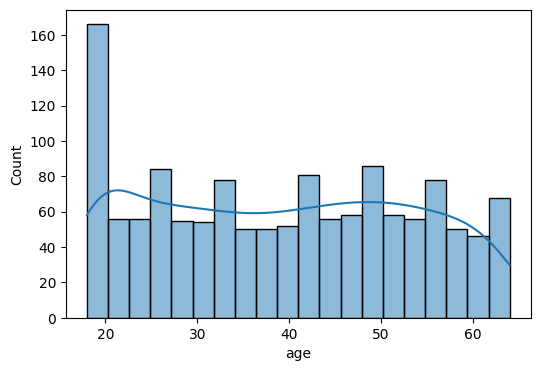

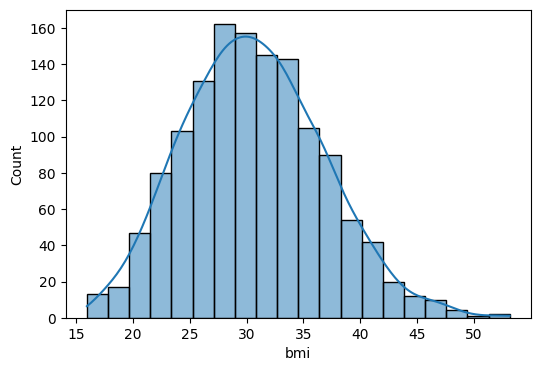

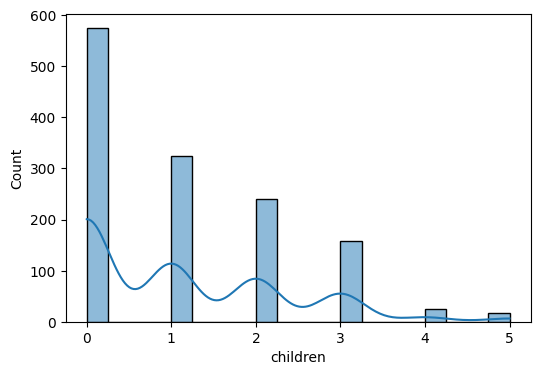

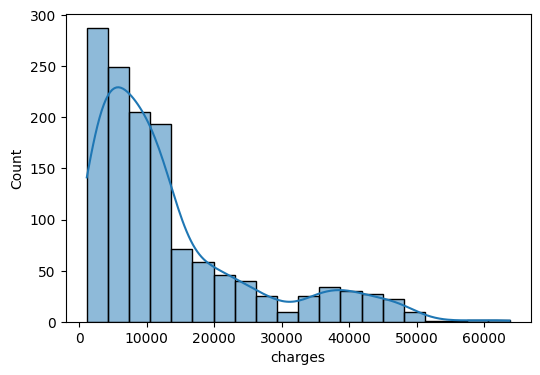

In [12]:
numeric_col = ['age','bmi','children','charges']

for col in numeric_col:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],bins=20,kde = True)
    plt.show()

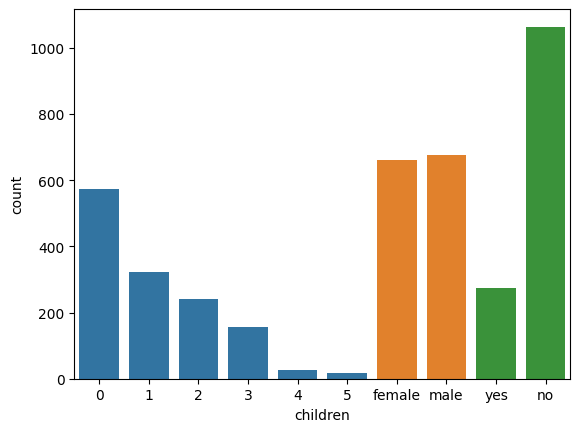

In [13]:
sns.countplot(x = df['children'])
sns.countplot(x = df['sex'])
sns.countplot(x = df['smoker'])
plt.show()

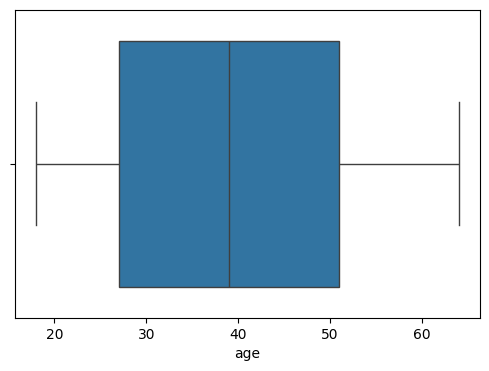

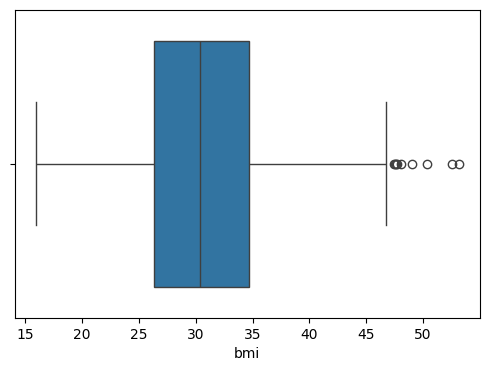

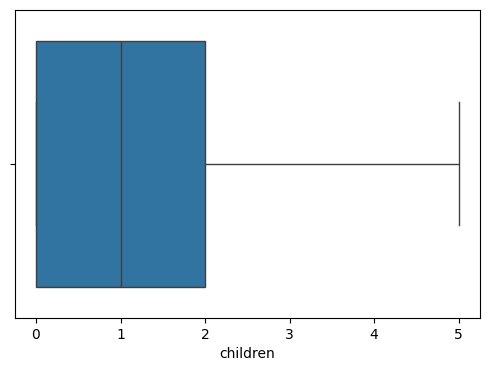

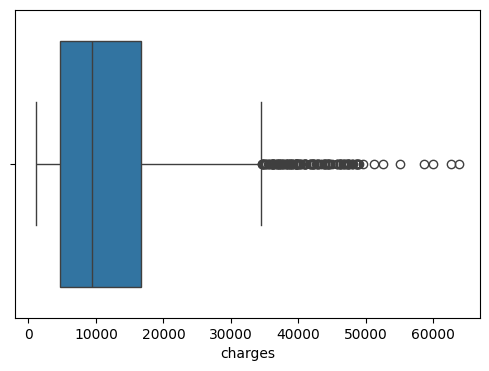

In [14]:
for col in numeric_col:
    plt.figure(figsize=(6,4))
    sns.boxplot(x = df[col])
    plt.show()

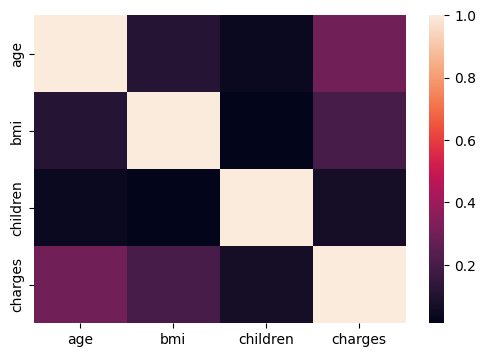

In [15]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True))
plt.show()

### DATA CLEANING AND PREPROCESSING
##data cleaning

In [16]:
df_cleaned = df.copy()

print(df_cleaned.head())
df_cleaned.drop_duplicates(inplace = True)
print(df_cleaned.shape)
print(df_cleaned.isnull().sum())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
(1337, 7)
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


##data preprocessing

In [17]:
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

#sex col

In [18]:
df_cleaned['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [19]:
df_cleaned['sex'] = df_cleaned['sex'].map({"female" : 1,"male" : 0})
df_cleaned.rename(columns={'sex' : 'is_female'},inplace = True)
df_cleaned.head()

,age,is_female,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


#smoker col

In [20]:
df_cleaned['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [21]:
df_cleaned['smoker'] = df_cleaned['smoker'].map({"yes" : 1,"no" : 0})
df_cleaned.rename(columns={'smoker' : 'is_smoker'},inplace = True)
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


#region col

In [22]:
df_cleaned['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

#

In [23]:
df_cleaned = pd.get_dummies(df_cleaned,columns=['region'],drop_first=True)
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [24]:
df_cleaned.astype(int)

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0
1334,18,1,31,0,0,2205,0,0,0
1335,18,1,36,0,0,1629,0,1,0
1336,21,1,25,0,0,2007,0,0,1


### FEATURE ENGINEERING

<Axes: xlabel='bmi', ylabel='Count'>

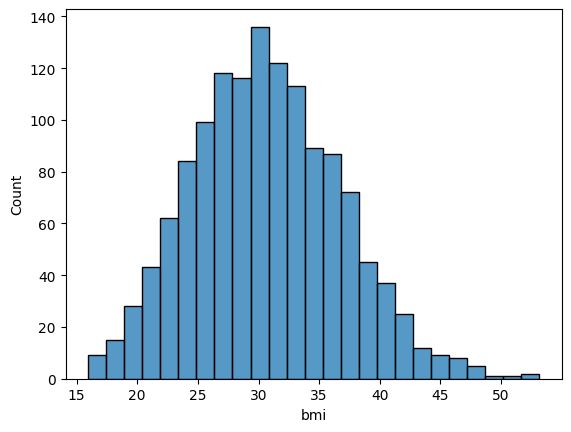

In [25]:
sns.histplot(df['bmi'])

In [26]:
df_cleaned['bmi_category'] = pd.cut(
    df_cleaned['bmi'],
    bins = [0, 18.5, 24.9, 29.9, float('inf')],
    labels=['underweight','normal','owerweight','obese']
)

In [27]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27.900,0,1,16884.92400,False,False,True,owerweight
1,18,0,33.770,1,0,1725.55230,False,True,False,obese
2,28,0,33.000,3,0,4449.46200,False,True,False,obese
3,33,0,22.705,0,0,21984.47061,True,False,False,normal
4,32,0,28.880,0,0,3866.85520,True,False,False,owerweight


In [28]:
df_cleaned = pd.get_dummies(df_cleaned,columns=['bmi_category'],drop_first=True)
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_normal,bmi_category_owerweight,bmi_category_obese
0,19,1,27.900,0,1,16884.92400,False,False,True,False,True,False
1,18,0,33.770,1,0,1725.55230,False,True,False,False,False,True
2,28,0,33.000,3,0,4449.46200,False,True,False,False,False,True
3,33,0,22.705,0,0,21984.47061,True,False,False,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False,False,True,False


In [29]:
df_cleaned.astype(int)

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_normal,bmi_category_owerweight,bmi_category_obese
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,0,0,1
1334,18,1,31,0,0,2205,0,0,0,0,0,1
1335,18,1,36,0,0,1629,0,1,0,0,0,1
1336,21,1,25,0,0,2007,0,0,1,0,1,0


FEATURE SELECTION

In [30]:
df_cleaned.dtypes

age                          int64
is_female                    int64
bmi                        float64
children                     int64
is_smoker                    int64
charges                    float64
region_northwest              bool
region_southeast              bool
region_southwest              bool
bmi_category_normal           bool
bmi_category_owerweight       bool
bmi_category_obese            bool
dtype: object

In [31]:
from sklearn.preprocessing import StandardScaler

cols = ['age','bmi','children']
scaler = StandardScaler()

df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])

In [32]:
df_cleaned = df_cleaned.astype(float)

In [33]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_normal,bmi_category_owerweight,bmi_category_obese
0,-1.440418,1.0,-0.453160,-0.909234,1.0,16884.92400,0.0,0.0,1.0,0.0,1.0,0.0
1,-1.511647,0.0,0.509422,-0.079442,0.0,1725.55230,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.799350,0.0,0.383155,1.580143,0.0,4449.46200,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.443201,0.0,-1.305052,-0.909234,0.0,21984.47061,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.514431,0.0,-0.292456,-0.909234,0.0,3866.85520,1.0,0.0,0.0,0.0,1.0,0.0


#CORELATION CALCULATION

In [34]:
from scipy.stats import pearsonr

In [35]:
#List of features to check against target 
selected_features = [
    'age', 'is_female', 'bmi', 'children','is_smoker',
    'region_northwest', 'region_southeast','region_southwest',
    'bmi_category_normal','bmi_category_owerweight', 'bmi_category_obese'
]

correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['charges'])[0]
    for feature in selected_features
}
correlation_df = pd.DataFrame(list(correlations.items()), columns = ['Feature', 'Pearson Correlation'])
correlation_df.sort_values(by = 'Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
4,is_smoker,0.787234
0,age,0.298308
2,bmi,0.198401
10,bmi_category_obese,0.197659
6,region_southeast,0.073578
3,children,0.067389
5,region_northwest,-0.038695
7,region_southwest,-0.043637
1,is_female,-0.058044
8,bmi_category_normal,-0.105655


In [36]:
cat_features = [
    'is_female','is_smoker',
    'region_northwest', 'region_southeast','region_southwest',
    'bmi_category_normal','bmi_category_owerweight', 'bmi_category_obese'
]

In [37]:
from scipy.stats import chi2_contingency
import pandas as pd

In [38]:
alpha = 0.05

df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'], q = 4, labels=False)
chi2_results = {}
df_cleaned


,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_normal,bmi_category_owerweight,bmi_category_obese,charges_bin
0,-1.440418,1.0,-0.453160,-0.909234,1.0,16884.92400,0.0,0.0,1.0,0.0,1.0,0.0,3
1,-1.511647,0.0,0.509422,-0.079442,0.0,1725.55230,0.0,1.0,0.0,0.0,0.0,1.0,0
2,-0.799350,0.0,0.383155,1.580143,0.0,4449.46200,0.0,1.0,0.0,0.0,0.0,1.0,0
3,-0.443201,0.0,-1.305052,-0.909234,0.0,21984.47061,1.0,0.0,0.0,1.0,0.0,0.0,3
4,-0.514431,0.0,-0.292456,-0.909234,0.0,3866.85520,1.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.767704,0.0,0.050269,1.580143,0.0,10600.54830,1.0,0.0,0.0,0.0,0.0,1.0,2
1334,-1.511647,1.0,0.206053,-0.909234,0.0,2205.98080,0.0,0.0,0.0,0.0,0.0,1.0,0
1335,-1.511647,1.0,1.014490,-0.909234,0.0,1629.83350,0.0,1.0,0.0,0.0,0.0,1.0,0
1336,-1.297958,1.0,-0.797524,-0.909234,0.0,2007.94500,0.0,0.0,1.0,0.0,1.0,0.0,0


In [ ]:
for col in cat_features:
    contingency = pd.crosstab(df_cleaned[col], df_cleaned['charges_bin'])
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null(Drop Feature)'
    chi2_results[col] = {
        'chi2_statistics': chi2_stat,
        'p_value' : p_val,
        'Decision': decision
    }

chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by = 'p_value')
chi2_df                                                          

,chi2_statistics,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is_female,10.258784,0.01649,Reject Null (Keep Feature)
bmi_category_obese,7.654464,0.05372,Accept Null(Drop Feature)
region_southwest,5.091893,0.165191,Accept Null(Drop Feature)
bmi_category_normal,4.263673,0.234364,Accept Null(Drop Feature)
bmi_category_owerweight,4.201575,0.240504,Accept Null(Drop Feature)
region_northwest,1.13424,0.768815,Accept Null(Drop Feature)


In [44]:
final_df = df_cleaned[['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges', 'region_southeast', 'bmi_category_obese']]
final_df

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi_category_obese
0,-1.440418,1.0,-0.453160,-0.909234,1.0,16884.92400,0.0,0.0
1,-1.511647,0.0,0.509422,-0.079442,0.0,1725.55230,1.0,1.0
2,-0.799350,0.0,0.383155,1.580143,0.0,4449.46200,1.0,1.0
3,-0.443201,0.0,-1.305052,-0.909234,0.0,21984.47061,0.0,0.0
4,-0.514431,0.0,-0.292456,-0.909234,0.0,3866.85520,0.0,0.0
...,...,...,...,...,...,...,...,...
1333,0.767704,0.0,0.050269,1.580143,0.0,10600.54830,0.0,1.0
1334,-1.511647,1.0,0.206053,-0.909234,0.0,2205.98080,0.0,1.0
1335,-1.511647,1.0,1.014490,-0.909234,0.0,1629.83350,1.0,1.0
1336,-1.297958,1.0,-0.797524,-0.909234,0.0,2007.94500,0.0,0.0
